In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv",encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1763,ham,Joy's father is John. Then John is the NAME of...,NaN,NaN,NaN
3704,ham,Ok. Very good. Its all about making that money.,NaN,NaN,NaN
3471,ham,I think IÛ÷m waiting for the same bus! Inform...,NaN,NaN,NaN
249,spam,Congratulations ur awarded 500 of CD vouchers ...,NaN,NaN,NaN
1154,ham,Did u find a sitter for kaitlyn? I was sick an...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA (Exploratory Data Analysis)
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last three columns #inplace=True used when the dataframe changes have to be made permanent
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2193,ham,I called but no one pick up e phone. I ask bot...
2050,ham,Hi where you. You in home or calicut?
3171,ham,Do u still have plumbers tape and a wrench we ...
4304,ham,Yo come over carlos will be here soon
376,ham,You could have seen me..i did't recognise you ...


In [9]:
# renaming the columns #specifying columns using a dictionary
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4524,ham,Cos i was out shopping wif darren jus now n i ...
4961,ham,Yup ok...
787,spam,Ever thought about living a good life with a p...
2426,spam,Valentines Day Special! Win over å£1000 in our...
2643,ham,Hi! You just spoke to MANEESHA V. We'd like to...


In [10]:
# Applyig Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. EDA

In [18]:
# Whenever you are doing a task of predictive modelling or solving a supervised machine learning problem, which in this case, 
# we are working on a classification problem, you should have an understanding of data. This comes by performing EDA 
# (Exploratory Data Analysis). In our case there are only two columns. Firstly we need to check how many messages are spam, and
# how many are ham ones.

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#running value counts on top of my data frame
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [21]:
#above output shows that there is a lot of ham in our data, while the spam is only 653

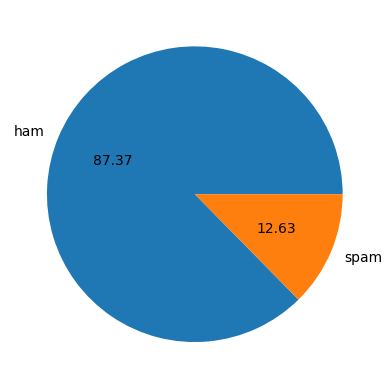

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f") #here autopct is used to check percentage value
plt.show() #plt.show is used to remove the extra piece of code               #also 0.2f is used to check upto 2 decimal places                                                                                            

In [23]:
# Data is imbalanced as shown in the pie-chart. Keep this in mind.

In [24]:
# next we can perform an analysis on how many alphabets, words and sentences are used in our data.
# For our analysis we are making three columns. 
# First: No. of columns in the sms.
# Second: No. of words in the sms.
# Third: No. of sentences in the sms.

In [25]:
import nltk #This is a library called Natural Language Toolkit. Very famous NLP library.

In [26]:
nltk.download('punkt') # to download a few dependencies needed for nltk to work

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# next lets fetch the num of words. It is a bit tricky, so we will use nltk module.
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) 
#In lambda func., as soon as we get text, we will apply nltk.word_tokenize
#i.e we are breaking all the sms on the basis of words.
# using len func to to calculate length of the list which is being made

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
#to add number of sentences just replace word_tokenize function by sent_tokenize function.
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) 

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# analyzing ham and spam differently
# 1.ham: we have to pass a list
# for ham it is 0
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# 2.spam
# for spam it is 1
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
# now let us plot histograms for both categories, ham and spam
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

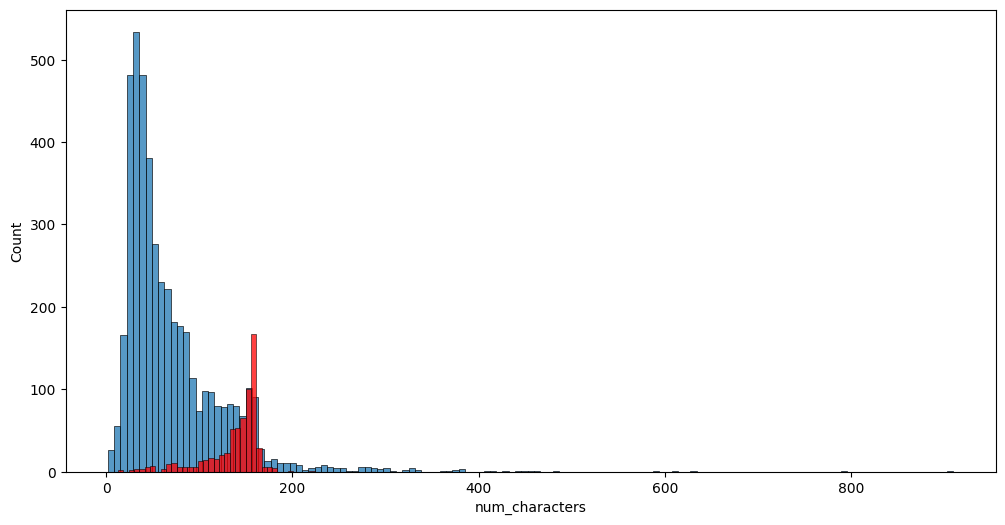

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
#from the below hist, we can infer that in most of the ham messages, the number of characters used are very less.
#whereas, in spam messages, the number of characters which are used are more.
#plt.figure used to clearly view the distribution.

<Axes: xlabel='num_words', ylabel='Count'>

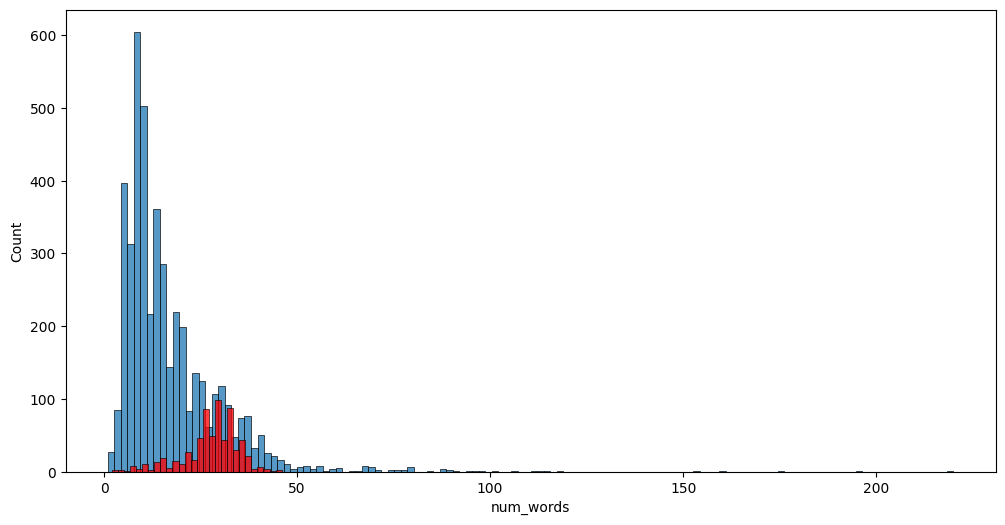

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

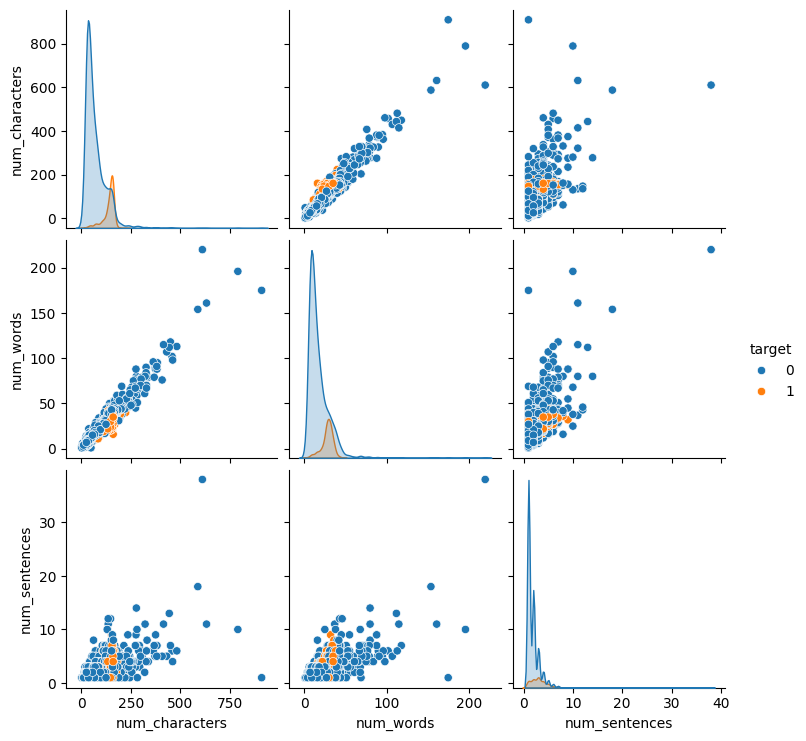

In [39]:
# let us find the relation between these columns, i.e. relation between no.of words and no. of sentences. Use pairplot to find:
sns.pairplot(df,hue='target')
#In the below data there are many outliers. They can disturb the code. We will see about them in a while...

In [40]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_cols}")

Non-numeric columns: Index(['text'], dtype='object')


In [41]:
# Compute the correlation matrix excluding non-numeric columns
corr = df.select_dtypes(include='number').corr()

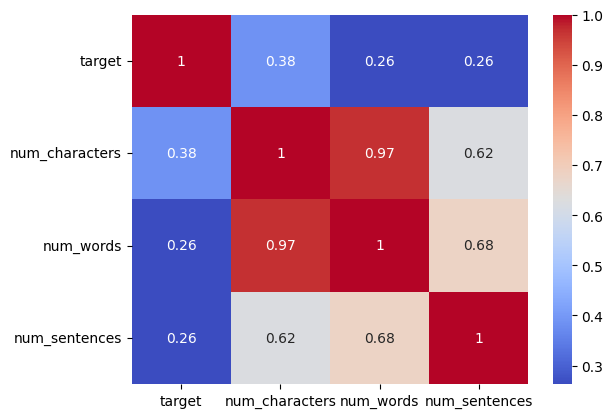

In [42]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [43]:
#since there is very hugh correlation between each column, we will keep only one column. In this case, we will keep num_char
#target column.

# 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    #running a loop
    #only keep those characters which are either alphabetical or alphanumeric
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    #text = y This part of code is incorrect. You can't copy the list like this. You will have to clone it.
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [45]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neill\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
#below code only for reference purpose:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
#Just for reference purpose 
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
#transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
#here stopwords will not come in output. eg: i, me, we, our, yourself, etc. won't be seen in the output
#? is not seen because it is a punctuation

In [50]:
#searching for special character
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [51]:
#Stemming
from nltk.stem.porter import PorterStemmer
#creating an object of PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
#let's make word cloud for both spam and ham messages, which will shows the impirtant words in bigger format. 

In [55]:
from wordcloud import WordCloud #here WordCloud is a class.
#Now let us make an object of this class
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
#filtering only those rows which have spam and then from it
#extracting the trasnformed_text column, taking out the string from within that and concatenating it on top of space

In [57]:
#to display this we need the following

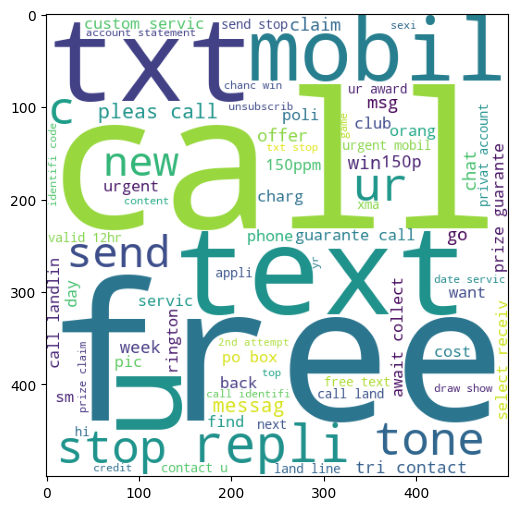

In [58]:
#to see a bigger version:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
#the following image shows how the type of messages are in spam. 

In [59]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

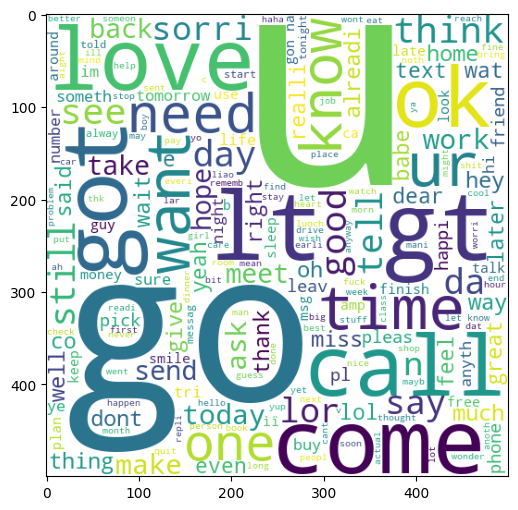

In [60]:
#to see a bigger version:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
#the following image shows how the type of messages are in ham.

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [62]:
#fetching transformed_text column from spam messages and converting it into a list.
#now it is a list of strings.
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    #we want to seperate all the words
    for word in msg.split():
        spam_corpus.append(word)
        

In [63]:
len(spam_corpus)

9939

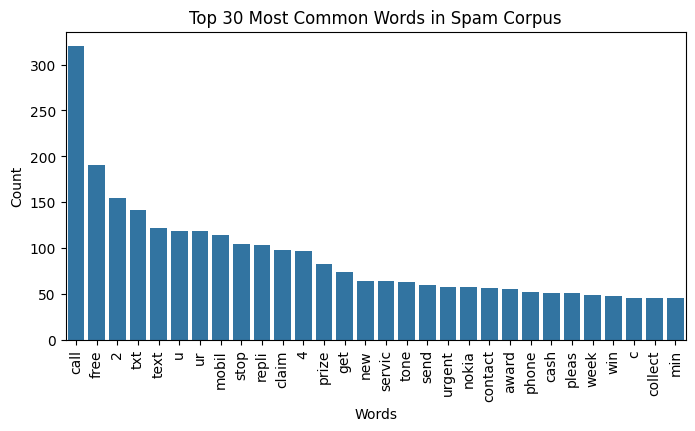

In [64]:
from collections import Counter
# Create a DataFrame with both words and counts
df_most_common_30 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Plot the bar chart
plt.figure(figsize=(8, 4))
sns.barplot(data=df_most_common_30, x='Word', y='Count')

# Customize plot
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()

In [65]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    #we want to seperate all the words
    for word in msg.split():
        ham_corpus.append(word)

In [66]:
len(ham_corpus)

35404

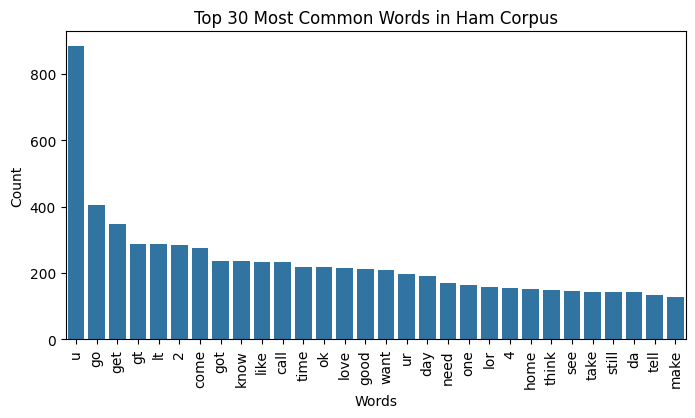

In [67]:
from collections import Counter
# Create a DataFrame with both words and counts
df_most_common_30_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Plot the bar chart
plt.figure(figsize=(8, 4))
sns.barplot(data=df_most_common_30_ham, x='Word', y='Count')

# Customize plot
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.show()

In [68]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [69]:
#first model we will be making is a Naive-Based Model. It gives the best performance for textual data.

In [70]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [71]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
# converting sparse array to dense array

In [72]:
X.shape

(5169, 3000)

In [73]:
y = df['target'].values

In [74]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
# Applying Train Test Split using scikit learn module

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
# Importing everything from 2-3 naive bayes algorithm because we don't know the data's distribution
# Also importing some metrics
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [79]:
# This is a high-precision model. In email or sms spam classifiers, if we want to reduce the false positives
# a high precision model is used.

In [80]:
# creating objects of the three algorithms
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
# Training the model

In [82]:
# This will give the output for the Gaussian Naive Bayes.
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
# The output shows the precision score do be very less. Which means the model is performing very badly

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [83]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [84]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [85]:
# Since the precision of Multinomial Naive Bayes is the highest and it is making no mistakes, we will go with that
# tfidf -> MNB

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [87]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [88]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [89]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [90]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


D:\Python New for College\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [92]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [93]:
#Sorted according to precision
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [94]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [95]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


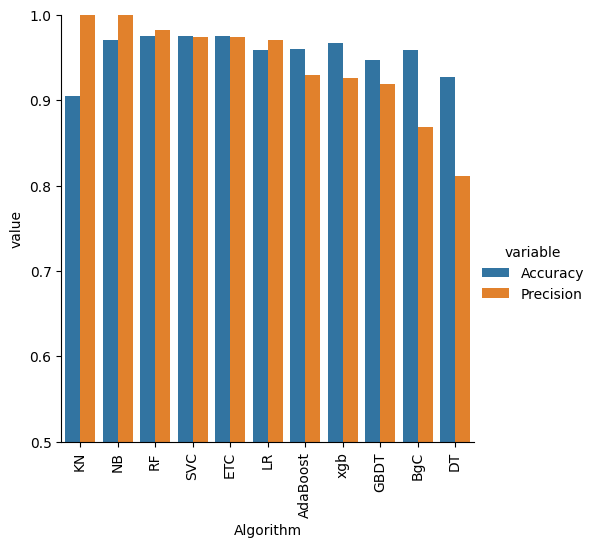

In [96]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [97]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [99]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [100]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [101]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [102]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [103]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [104]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [105]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [106]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [107]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [108]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [109]:
from sklearn.ensemble import StackingClassifier

In [110]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [111]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [112]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))